# Phase 1 Project: Aviation Safety Analysis ***(Additional Notes)***

## Business Understanding
### Objective
The purpose of this project is to identify low-risk aircraft models and operational strategies to support the company's entry into the aviation sector.

### Key Deliverables
1. Recommendations for low-risk aircraft.
2. Insights into operational risks (e.g., flight phases, weather conditions).
3. Strategic guidance for improving safety in operations.

## Data Understanding

### Dataset Overview
- **Source**: National Transportation Safety Board (1962–2023)
- **Scope**: Aviation accidents and incidents across various models, flight phases, and weather conditions.

### Initial Observations
- The dataset contained missing values, mixed data types, and columns with varying relevance to the analysis.
- Preprocessing was needed to clean and prepare the data for meaningful analysis.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Try using an alternative encoding
Aviation_df = pd.read_csv('AviationData.csv', encoding='latin1')

# Preview the first few rows to ensure the file loaded correctly
Aviation_df

c:\Users\maktr\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### **Calculating Missing Data**
- Goal is to calculate and see how much of the missing values each category in the dataset have.
- That way, we can determine which columns we should probably keep, remove, and such.

In [49]:
# Calculate missing values per column
missing_data = Aviation_df.isnull().sum()

# Calculate the percentage of missing data for each column
missing_percentage = (missing_data / len(Aviation_df)) * 100

# Combine into a single DataFrame for better readability
missing_summary = pd.DataFrame({
    "Missing Values": missing_data,
    "Percentage Missing (%)": missing_percentage
}).sort_values(by="Percentage Missing (%)", ascending=False)

# Display the summary
print("Summary of Missing Data:")
print(missing_summary)

Summary of Missing Data:
                        Missing Values  Percentage Missing (%)
Schedule                         76307               85.845268
Air.carrier                      72241               81.271023
FAR.Description                  56866               63.974170
Aircraft.Category                56602               63.677170
Longitude                        54516               61.330423
Latitude                         54507               61.320298
Airport.Code                     38640               43.469946
Airport.Name                     36099               40.611324
Broad.phase.of.flight            27165               30.560587
Publication.Date                 13771               15.492356
Total.Serious.Injuries           12510               14.073732
Total.Minor.Injuries             11933               13.424608
Total.Fatal.Injuries             11401               12.826109
Engine.Type                       7077                7.961615
Report.Status                 

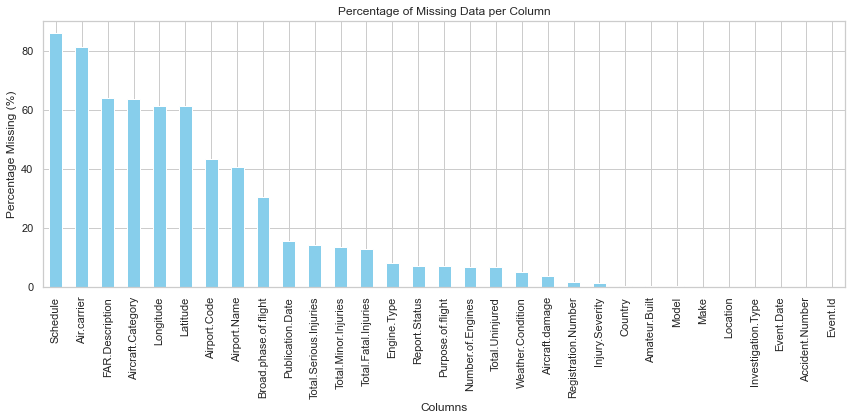

In [50]:
# Optional: Visualize missing data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
missing_summary["Percentage Missing (%)"].plot(kind='bar', color='skyblue')
plt.title("Percentage of Missing Data per Column")
plt.ylabel("Percentage Missing (%)")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Creation of new Column 'Total.Injured'

In [51]:
Aviation_df['Total.injured'] = Aviation_df['Total.Serious.Injuries'] +  Aviation_df['Total.Fatal.Injuries']



### **Data Analysis**
#### Analysis of Every Key Dataset and correlations to Injuries
- The goal was too analyize and see, based on each Data category, how much did each correlate to each number of injuries and non-injuries.
- In addition, most of the tables are sorted out by the number of times or moments this or that category was mentioned in the data set.



### Model

From the looks of it, looks like model "152" has had the most number of incidencies, with model "172" and "172N" close. The number of injuries and non-injuries % wise come pretty close too. Therefore, its better to find out what model mayy have been used per other category datasets.

In [52]:
# Simplified Model_summary calculation
Model_summary = Aviation_df.groupby('Model').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Model=('Model', 'size')
)

# Calculate Injured and Non-injured Percentages
Model_summary['Injured Percentage (%)'] = Model_summary['Total_Injured'] / (Model_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1)) * 100
Model_summary['Non-injured Percentage (%)'] = Model_summary['Total_Uninjured'] / (Model_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1)) * 100


# Sort by 'Total_Model' and get top 20 models
top_20_models = Model_summary.sort_values('Total_Model', ascending=False).head(20)
top_20_models

,Total_Injured,Total_Uninjured,Total_Model,Injured Percentage (%),Non-injured Percentage (%)
Model,,,,,
152,540.0,2364.0,2367,18.595041,81.404959
172,657.0,2253.0,1756,22.577320,77.422680
172N,542.0,1350.0,1164,28.646934,71.353066
PA-28-140,515.0,844.0,932,37.895511,62.104489
150,225.0,763.0,829,22.773279,77.226721
172M,378.0,1095.0,798,25.661914,74.338086
172P,302.0,857.0,689,26.056946,73.943054
182,313.0,844.0,659,27.052723,72.947277
180,151.0,997.0,622,13.153310,86.846690


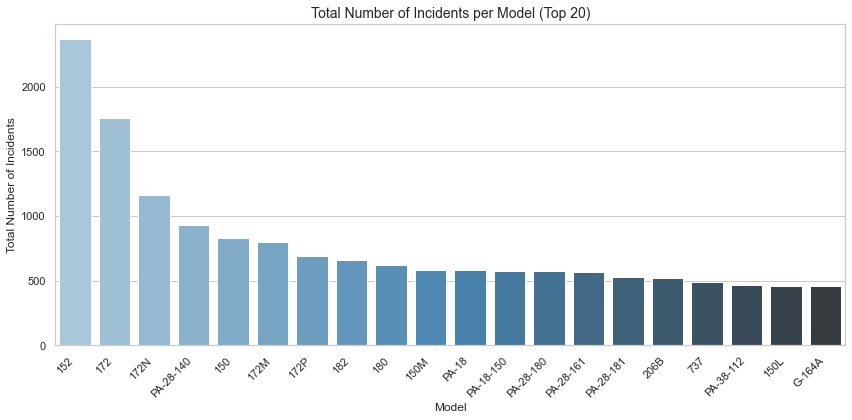

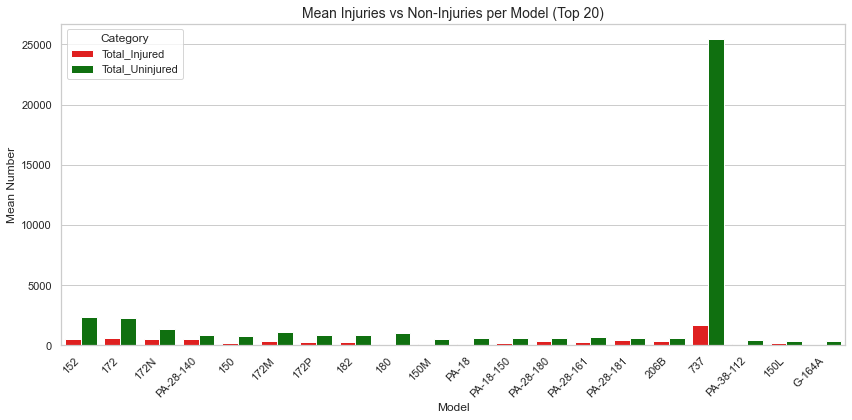

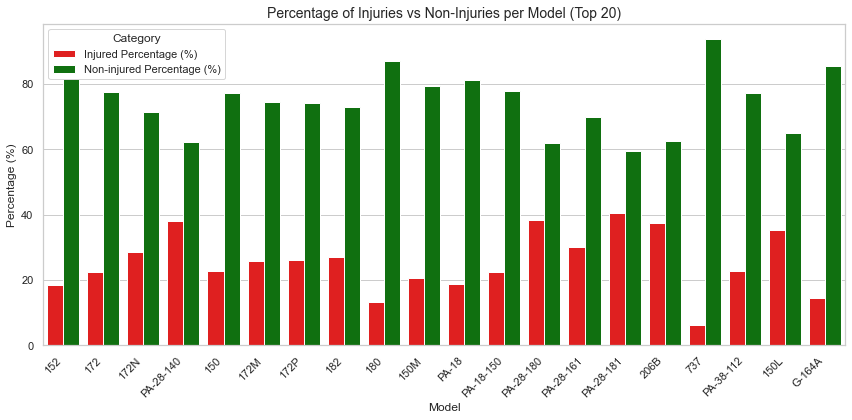

In [69]:
import seaborn as sns

# Bar Graph: Total Numbers of Each Model using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_models.index, y='Total_Model', data=top_20_models.reset_index(), palette='Blues_d')
plt.title('Total Number of Incidents per Model (Top 20)', fontsize=14)
plt.ylabel('Total Number of Incidents', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar Graph: Mean Injuries vs Non-Injuries per Top 20 Models using Seaborn
plt.figure(figsize=(12, 6))
injuries_uninjuries = top_20_models[['Total_Injured', 'Total_Uninjured']].reset_index().melt(
id_vars='Model', var_name='Category', value_name='Mean'
)
sns.barplot(x='Model', y='Mean', hue='Category', data=injuries_uninjuries, palette=['red', 'green'])
plt.title('Mean Injuries vs Non-Injuries per Model (Top 20)', fontsize=14)
plt.ylabel('Mean Number', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

# Bar Graph: Percent of Injuries vs Non-Injuries per Top 20 Models using Seaborn
plt.figure(figsize=(12, 6))
percentages = top_20_models[['Injured Percentage (%)', 'Non-injured Percentage (%)']].reset_index().melt(
    id_vars='Model', var_name='Category', value_name='Percentage'
)
sns.barplot(x='Model', y='Percentage', hue='Category', data=percentages, palette=['red', 'green'])
plt.title('Percentage of Injuries vs Non-Injuries per Model (Top 20)', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

### Engine.Type

In [54]:
# Group by 'Engine.Type' and calculate required statistics in one step
Engine_summary = Aviation_df.groupby('Engine.Type').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Uses=('Engine.Type', 'size')
)

# Calculate Injured and Non-injured Percentages
Engine_summary['Injured Percentage (%)'] = Engine_summary['Total_Injured'] / (Engine_summary['Total_Injured'] + Engine_summary['Total_Uninjured']) * 100
Engine_summary['Non-injured Percentage (%)'] = Engine_summary['Total_Uninjured'] / (Engine_summary['Total_Injured'] + Engine_summary['Total_Uninjured']) * 100

# Sort by 'Total_Uses'
sorted_Engine_summary = Engine_summary.sort_values('Total_Uses', ascending=False)

# Display top 10 results
sorted_Engine_summary.head(10)



,Total_Injured,Total_Uninjured,Total_Uses,Injured Percentage (%),Non-injured Percentage (%)
Engine.Type,,,,,
Reciprocating,32408.0,75246.0,69530,30.103851,69.896149
Turbo Shaft,2563.0,4858.0,3609,34.537124,65.462876
Turbo Prop,2670.0,16835.0,3391,13.688798,86.311202
Turbo Fan,5357.0,211048.0,2481,2.475451,97.524549
Unknown,4377.0,12794.0,2051,25.490653,74.509347
Turbo Jet,1014.0,34072.0,703,2.890042,97.109958
None,13.0,90.0,19,12.621359,87.378641
Geared Turbofan,0.0,121.0,12,0.000000,100.000000
Electric,3.0,7.0,10,30.000000,70.000000


### Aircraft.Category

In [55]:
# Group by 'Aircraft.Category' and calculate required statistics
Aircraft_summary = Aviation_df.groupby('Aircraft.Category').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Uses=('Aircraft.Category', 'size')
)

# Calculate Injured and Non-injured Percentages
Aircraft_summary['Injured Percentage (%)'] = Aircraft_summary['Total_Injured'] / Aircraft_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1) * 100
Aircraft_summary['Non-injured Percentage (%)'] = Aircraft_summary['Total_Uninjured'] / Aircraft_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1) * 100

# Sort by 'Total_Uses' and display top 20 results
sorted_Aircraft_summary = Aircraft_summary.sort_values('Total_Uses', ascending=False).head(20)

sorted_Aircraft_summary.head(20)


,Total_Injured,Total_Uninjured,Total_Uses,Injured Percentage (%),Non-injured Percentage (%)
Aircraft.Category,,,,,
Airplane,21394.0,170111.0,27617,11.171510,88.828490
Helicopter,2657.0,3873.0,3440,40.689127,59.310873
Glider,196.0,337.0,508,36.772983,63.227017
Balloon,199.0,842.0,231,19.116234,80.883766
Gyrocraft,96.0,84.0,173,53.333333,46.666667
Weight-Shift,125.0,47.0,161,72.674419,27.325581
Powered Parachute,55.0,23.0,91,70.512821,29.487179
Ultralight,16.0,10.0,30,61.538462,38.461538
Unknown,23.0,18.0,14,56.097561,43.902439


### Make

In [56]:
Aviation_df['Make'] = Aviation_df['Make'].str.strip().str.lower()

# Group by 'Make' and calculate all required statistics in one step
Make_summary = Aviation_df.groupby('Make').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Uses=('Make', 'size')  # Count occurrences of each model
)

# Add percentage columns for injuries and non-injuries
Make_summary['Injured Percentage (%)'] = (
    Make_summary['Total_Injured'] / 
    (Make_summary['Total_Injured'] + Make_summary['Total_Uninjured']) * 100
)
Make_summary['Non-injured Percentage (%)'] = (
    Make_summary['Total_Uninjured'] / 
    (Make_summary['Total_Injured'] + Make_summary['Total_Uninjured']) * 100
)

# Sort by 'Total_Uses' for the most frequently used models
sorted_Make_summary = Make_summary.sort_values(by='Total_Uses', ascending=False)

# Display the summary
print("Portion of Injured vs Non-Injured by Make Category:")
sorted_Make_summary.head(10)

Portion of Injured vs Non-Injured by Make Category:


,Total_Injured,Total_Uninjured,Total_Uses,Injured Percentage (%),Non-injured Percentage (%)
Make,,,,,
cessna,12425.0,34423.0,27149,26.521943,73.478057
piper,8547.0,17832.0,14870,32.400773,67.599227
beech,4105.0,7891.0,5372,34.219740,65.780260
boeing,8302.0,208375.0,2745,3.831510,96.168490
bell,1925.0,3072.0,2722,38.523114,61.476886
mooney,816.0,1303.0,1334,38.508731,61.491269
robinson,662.0,1132.0,1230,36.900780,63.099220
grumman,340.0,1229.0,1172,21.669853,78.330147
bellanca,489.0,930.0,1045,34.460888,65.539112


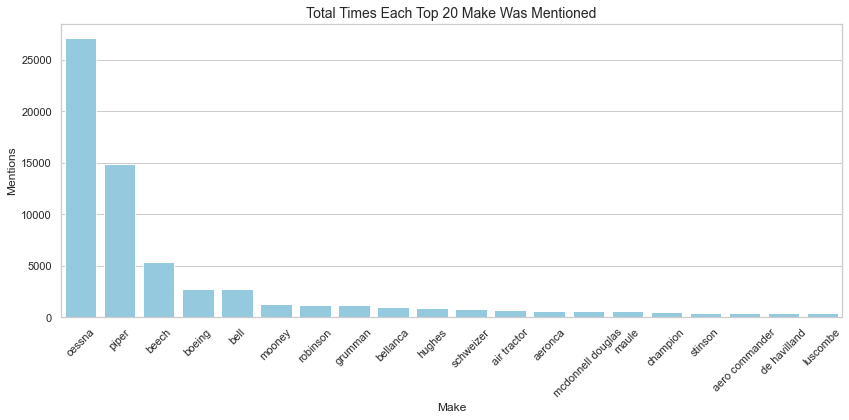

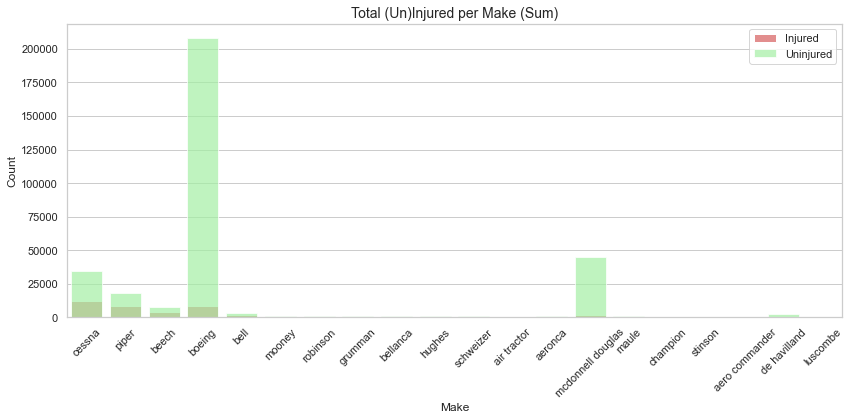

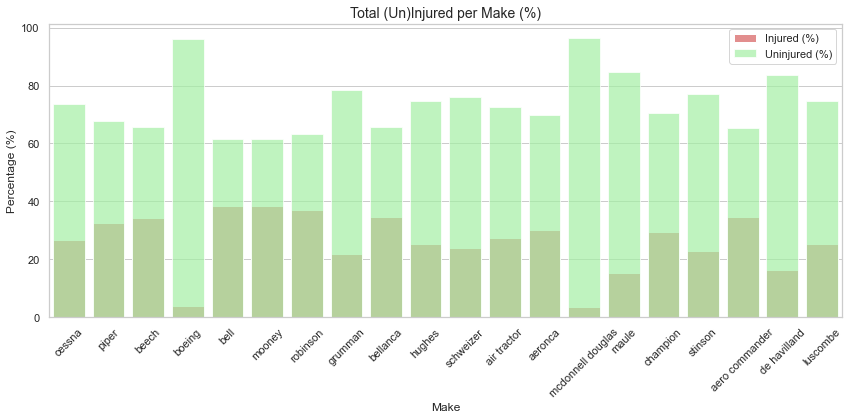

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Graph 1: Total Times Each Make Was Mentioned
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Total_Uses', color='skyblue')
plt.title('Total Times Each Top 20 Make Was Mentioned', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Mentions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Graph 2: Total Injured vs Uninjured (Sum)
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Total_Injured', color='lightcoral', label='Injured')
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Total_Uninjured', color='palegreen', alpha=0.7, label='Uninjured')
plt.title('Total (Un)Injured per Make (Sum)', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Graph 3: Injured vs Uninjured Percentage
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Injured Percentage (%)', color='lightcoral', label='Injured (%)')
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Non-injured Percentage (%)', color='palegreen', alpha=0.7, label='Uninjured (%)')
plt.title('Total (Un)Injured per Make (%)', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()





### Broad.Phase.of.Flight

In [58]:
# Group by 'Broad.phase.of.flight' and calculate required statistics
Phase_summary = Aviation_df.groupby('Broad.phase.of.flight').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Times_Mentioned=('Broad.phase.of.flight', 'count')
)

# Calculate Injured and Non-injured Percentages
Phase_summary['Injured Percentage (%)'] = Phase_summary['Total_Injured'] / Phase_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1) * 100
Phase_summary['Non-injured Percentage (%)'] = Phase_summary['Total_Uninjured'] / Phase_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1) * 100

# Sort by 'Total_Times' and display top 10 results
sorted_Phase_summary = Phase_summary.sort_values('Total_Times_Mentioned', ascending=False).head(10)

sorted_Phase_summary


,Total_Injured,Total_Uninjured,Total_Times_Mentioned,Injured Percentage (%),Non-injured Percentage (%)
Broad.phase.of.flight,,,,,
Landing,1437.0,48533.0,15428,2.875725,97.124275
Takeoff,6010.0,45083.0,12493,11.762864,88.237136
Cruise,6836.0,45757.0,10269,12.997927,87.002073
Maneuvering,5836.0,5447.0,8144,51.723832,48.276168
Approach,4865.0,21538.0,6546,18.425936,81.574064
Climb,2025.0,19508.0,2034,9.404170,90.595830
Taxi,182.0,38277.0,1958,0.473231,99.526769
Descent,1168.0,18958.0,1887,5.803438,94.196562
Go-around,802.0,2045.0,1353,28.170004,71.829996


### Severity


In [59]:
# Group by 'Make' and calculate all required statistics in one step
Severity_summary = Aviation_df.groupby('Injury.Severity').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Moments=('Injury.Severity', 'size')  # Count occurrences of each model
)

# Add percentage columns for injuries and non-injuries
Severity_summary['Injured Percentage (%)'] = (
    Severity_summary['Total_Injured'] / 
    (Severity_summary['Total_Injured'] + Severity_summary['Total_Uninjured']) * 100
)
Severity_summary['Non-injured Percentage (%)'] = (
    Severity_summary['Total_Uninjured'] / 
    (Severity_summary['Total_Injured'] + Severity_summary['Total_Uninjured']) * 100
)

# Sort by 'Total_Moments' for the most frequently used models
sorted_Severity_summary = Severity_summary.sort_values(by='Total_Moments', ascending=False)

# Display the summary
print("Portion of Injured vs Non-Injured by Injury Severity:")
sorted_Severity_summary.head(10)

Portion of Injured vs Non-Injured by Injury Severity:


,Total_Injured,Total_Uninjured,Total_Moments,Injured Percentage (%),Non-injured Percentage (%)
Injury.Severity,,,,,
Non-Fatal,14114.0,307135.0,67357,4.393477,95.606523
Fatal(1),6477.0,3858.0,6167,62.670537,37.329463
Fatal,15556.0,1428.0,5262,91.592087,8.407913
Fatal(2),6420.0,889.0,3711,87.836913,12.163087
Incident,18.0,124696.0,2219,0.014433,99.985567
Fatal(3),2927.0,35.0,1147,98.818366,1.181634
Fatal(4),2765.0,208.0,812,93.003700,6.996300
Fatal(5),944.0,1.0,235,99.894180,0.105820
Minor,302.0,452.0,218,40.053050,59.946950


### Purpose.of.Flight

In [60]:
# Group by 'Make' and calculate all required statistics in one step
Purpose_summary = Aviation_df.groupby('Purpose.of.flight').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Times=('Purpose.of.flight', 'size')  # Count occurrences of each model
)

# Add percentage columns for injuries and non-injuries
Purpose_summary['Injured Percentage (%)'] = (
    Purpose_summary['Total_Injured'] / 
    (Purpose_summary['Total_Injured'] + Purpose_summary['Total_Uninjured']) * 100
)
Purpose_summary['Non-injured Percentage (%)'] = (
    Purpose_summary['Total_Uninjured'] / 
    (Purpose_summary['Total_Injured'] + Purpose_summary['Total_Uninjured']) * 100
)

# Sort by 'Total_Times' for the most frequently used models
sorted_Purpose_summary = Purpose_summary.sort_values(by='Total_Times', ascending=False)

# Display the summary
print("Portion of Injured vs Non-Injured by Weather.Condition:")
sorted_Purpose_summary.head(10)

Portion of Injured vs Non-Injured by Weather.Condition:


,Total_Injured,Total_Uninjured,Total_Times,Injured Percentage (%),Non-injured Percentage (%)
Purpose.of.flight,,,,,
Personal,25388.0,52052.0,49448,32.784091,67.215909
Instructional,2891.0,12580.0,10601,18.686575,81.313425
Unknown,11445.0,166487.0,6802,6.432233,93.567767
Aerial Application,997.0,2944.0,4712,25.298148,74.701852
Business,2857.0,6471.0,4018,30.628216,69.371784
Positioning,683.0,2122.0,1646,24.349376,75.650624
Other Work Use,749.0,1878.0,1264,28.511610,71.488390
Ferry,302.0,634.0,812,32.264957,67.735043
Aerial Observation,646.0,912.0,794,41.463415,58.536585


### Weather.Condition

In [61]:
# Group by 'Weather.Condition' and calculate required statistics
Weather_summary = Aviation_df.groupby('Weather.Condition').agg(
    Total_Injured=('Total.injured', 'mean'),
    Total_Uninjured=('Total.Uninjured', 'mean'),
    Total_Times=('Weather.Condition', 'size')
)

# Calculate Injured and Non-injured Percentages
Weather_summary[['Injured Percentage (%)', 'Non-injured Percentage (%)']] = (
    Weather_summary[['Total_Injured', 'Total_Uninjured']]
    .div(Weather_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1), axis=0) * 100
)

# Sort by 'Total_Times' and display top 10 results
Weather_summary.sort_values('Total_Times', ascending=False).head(10)


,Total_Injured,Total_Uninjured,Total_Times,Injured Percentage (%),Non-injured Percentage (%)
Weather.Condition,,,,,
VMC,0.564169,4.185503,77303,11.878070,88.121930
IMC,2.269246,7.530171,5976,23.156950,76.843050
UNK,3.109141,13.122293,856,19.155058,80.844942
Unk,1.744275,26.874046,262,6.094959,93.905041


1. Which Model may be best and worst for Weather Purposes

In [62]:
# Create a pivot table for mean average of Total.Uninjuries by Model per Weather.Condition
pivot_table2 = Aviation_df.pivot_table(
    values='Total.Uninjured', 
    index= 'Model', 
    columns='Weather.Condition',
    aggfunc='sum'
).dropna()

# Display the pivot table
pivot_table2.head(20)

Weather.Condition,IMC,UNK,Unk,VMC
Model,,,,
172,41.0,1.0,0.0,2164.0
172M,11.0,8.0,1.0,1074.0
172N,21.0,8.0,0.0,1320.0
175,3.0,0.0,0.0,179.0
177B,4.0,0.0,0.0,186.0
180,13.0,3.0,2.0,973.0
182,40.0,4.0,7.0,779.0
206,5.0,5.0,1.0,499.0
207,34.0,0.0,0.0,281.0


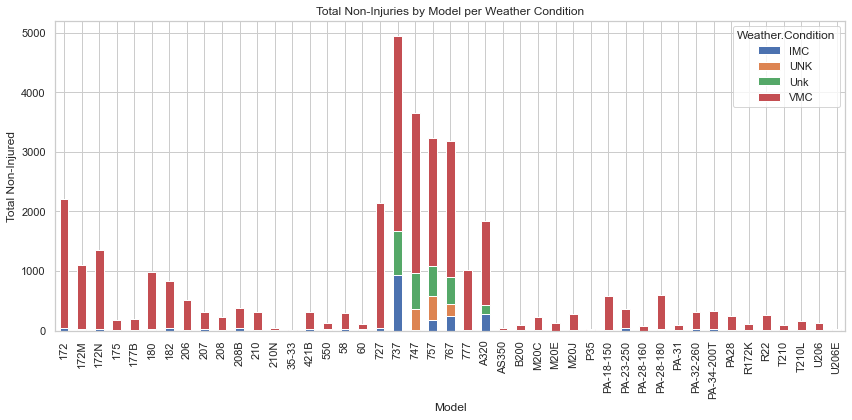

In [68]:
import matplotlib.pyplot as plt

# Create a pivot table for Total.Uninjured by Model per Weather.Condition
pivot_table2 = Aviation_df.pivot_table(
    values='Total.Uninjured', 
    index='Model', 
    columns='Weather.Condition', 
    aggfunc='sum'
).dropna()

# Plot the bar graph
pivot_table2.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add title and labels
plt.title('Total Non-Injuries by Model per Weather Condition')
plt.xlabel('Model')
plt.ylabel('Total Non-Injured')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

In [63]:
# Create a pivot table for mean average of Total.Uninjuries by Model per Weather.Condition
pivot_table2 = Aviation_df.pivot_table(
    values='Total.injured', 
    index= 'Model', 
    columns='Weather.Condition',
    aggfunc='sum'
).dropna()

# Display the pivot table
pivot_table2.head(20)


Weather.Condition,IMC,UNK,Unk,VMC
Model,,,,
172,67.0,8.0,9.0,451.0
172M,64.0,5.0,0.0,302.0
172N,110.0,15.0,4.0,392.0
175,11.0,1.0,0.0,45.0
177B,33.0,3.0,3.0,58.0
180,29.0,0.0,0.0,120.0
182,39.0,3.0,5.0,194.0
206,25.0,7.0,9.0,137.0
207,25.0,22.0,3.0,41.0


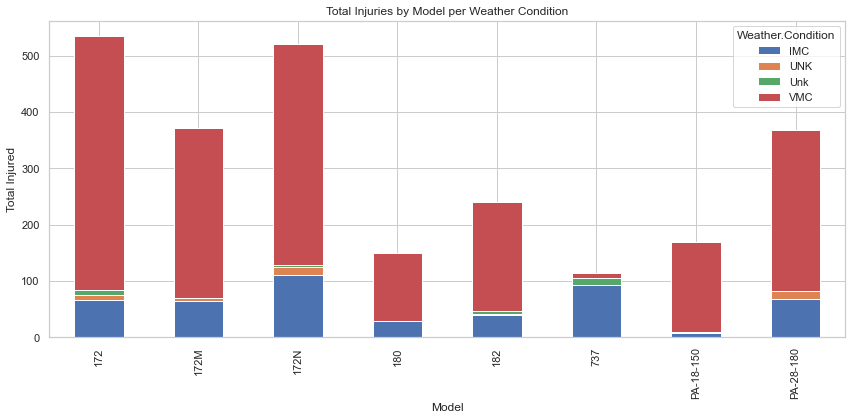

In [79]:
import matplotlib.pyplot as plt

# Get the top 20 models based on the count of occurrences in Model_summary
top_20_models = Model_summary.sort_values('Total_Model', ascending=False).head(20).index

# Filter Aviation_df to include only rows where 'Model' is in the top 20 models
Aviation_df['top_20_models'] = Aviation_df['Model'].where(Aviation_df['Model'].isin(top_20_models))

# Drop rows where the 'top_20_models' column is NaN (i.e., models not in the top 20)
Aviation_df_filtered = Aviation_df.dropna(subset=['top_20_models'])

# Create a pivot table for Total.Injured by Model per Weather.Condition
pivot_table2 = Aviation_df_filtered.pivot_table(
    values='Total.injured', 
    index='top_20_models', 
    columns='Weather.Condition', 
    aggfunc='sum'
).dropna()

# Plot the bar graph
pivot_table2.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add title and labels
plt.title('Total Injuries by Model per Weather Condition')
plt.xlabel('Model')
plt.ylabel('Total Injured')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()
